In [51]:
# Import des packages nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_DCA_l2 = pd.read_excel("L2/results_A_IEEE_6bus_DCA_l2_2_100_1.5_1.0.xlsx", sheet_name="results")
df_GRB_l2 = pd.read_excel("L2/results_A_IEEE_6bus_GRB_l2_2_100_1.5_1.0.xlsx", sheet_name="results")
df_GRB_l1 = pd.read_excel("L1/results_A_IEEE_6bus_GRB_l1_2_100_4.5_1.0.xlsx", sheet_name="results")
df_DCA_l1 = pd.read_excel("L1/results_A_IEEE_6bus_DCA_l1_2_100_4.5_1.0.xlsx", sheet_name="results")


df_list = [df_DCA_l2, df_DCA_l1, df_GRB_l2, df_GRB_l1]
labels = ["DRO L2 (DCA)", "DRO L1 (DCA)", "DRO L2 (GRB)", "DRO L1 (GRB)"]

# force = 1.0
# df_risk_neutral = pd.read_excel(f"SP/results_A_IEEE_118_syst_risk_neutral_35_100_-1.0_{force}.xlsx", sheet_name="results")
# df_DCA_l2 = pd.read_excel(f"L2/results_A_IEEE_118_syst_DCA_l2_35_100_1.5_{force}.xlsx", sheet_name="results")
# df_DCA_l1 = pd.read_excel(f"L1/results_A_IEEE_118_syst_DCA_l1_35_100_10.0_{force}.xlsx", sheet_name="results")
# df_KL_07 = pd.read_excel(f"KL/results_A_IEEE_118_syst_KL_35_100_0.9_{force}.xlsx", sheet_name="results0.7")
# df_KL_08 = pd.read_excel(f"KL/results_A_IEEE_118_syst_KL_35_100_0.9_{force}.xlsx", sheet_name="results0.8")
# df_KL_09 = pd.read_excel(f"KL/results_A_IEEE_118_syst_KL_35_100_0.9_{force}.xlsx", sheet_name="results0.9")
# df_AVAR_07 = pd.read_excel(f"AVAR/results_A_IEEE_118_syst_AVAR_35_100_0.9_{force}.xlsx", sheet_name="results0.7")
# df_AVAR_08 = pd.read_excel(f"AVAR/results_A_IEEE_118_syst_AVAR_35_100_0.9_{force}.xlsx", sheet_name="results0.8")
# df_AVAR_09 = pd.read_excel(f"AVAR/results_A_IEEE_118_syst_AVAR_35_100_0.9_{force}.xlsx", sheet_name="results0.9")

# df_list = [df_DCA_l2, df_DCA_l1, df_KL_07, df_KL_08, df_KL_09, df_AVAR_07, df_AVAR_08, df_AVAR_09, df_risk_neutral]
# labels = ["DRO L2 (DCA)", "DRO L1 (DCA)", "KL 0.7", "KL 0.8", "KL 0.9", "AVAR 0.7", "AVAR 0.8", "AVAR 0.9", "Risk Neutral"]

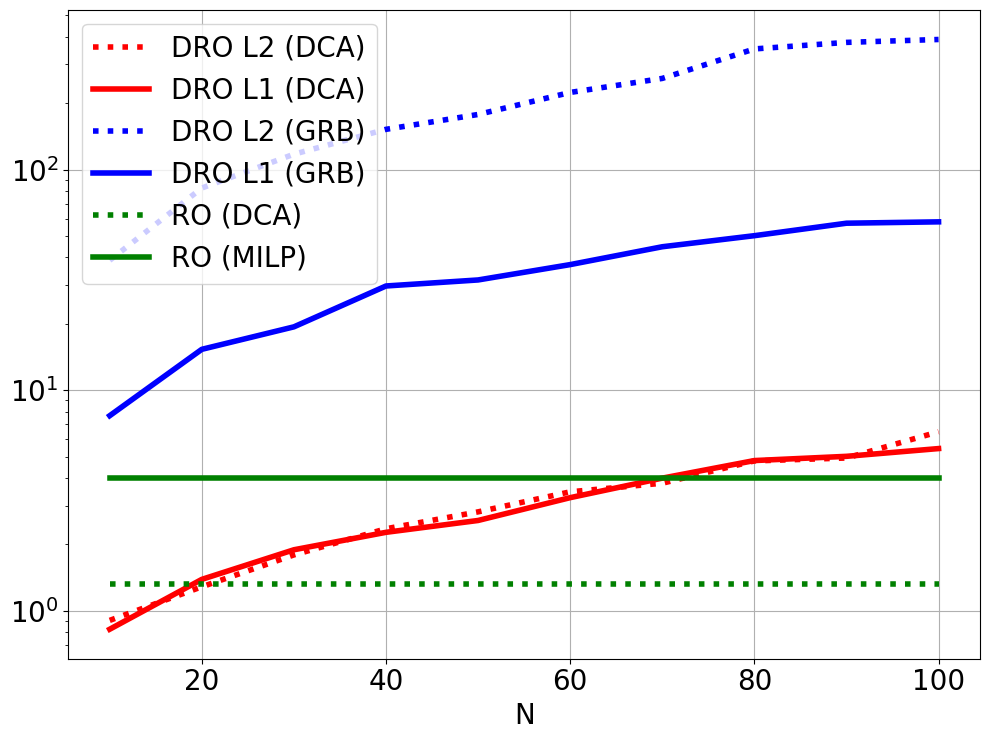

In [52]:
colors = ['red', 'red', 'blue', 'blue', 'green', 'green']
linestyles = [':', '-', ':', '-', ':', '-']

plt.figure(figsize=(10, 7.5))

for i, (df, label) in enumerate(zip(df_list, labels)):
    # Calculer la moyenne OOS et l'écart-type par nombre de scénarios
        
    mean_times = df.groupby('S')['Temps'].mean().reset_index()
    mean_times = mean_times.sort_values('S')
    
    plt.plot(mean_times['S'], mean_times['Temps'], 
             linewidth=4, 
             linestyle=linestyles[i],
             label=label,
             color=colors[i])


plt.plot([N for N in range(10, 110, 10)], [1.33 for N in range(10)], color='green', linestyle=':', linewidth=4, label="RO (DCA)")
plt.plot([N for N in range(10, 110, 10)], [4.01 for N in range(10)], color='green', linestyle='-', linewidth=4, label="RO (MILP)")
# plt.plot([N for N in range(10, 110, 10)], [61.54 for N in range(10)], color='green', linestyle='--', linewidth=3, label="RO (DCA)")
plt.xlabel("N", fontsize=20)
plt.yscale('log')
plt.tick_params(axis='both', labelsize=20)
# Augmenter la taille de la notation scientifique (1e6)
plt.gca().yaxis.offsetText.set_fontsize(16)
plt.legend(fontsize=20, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"time_comparison_DCA.pdf")  # Enregistrer le graphique

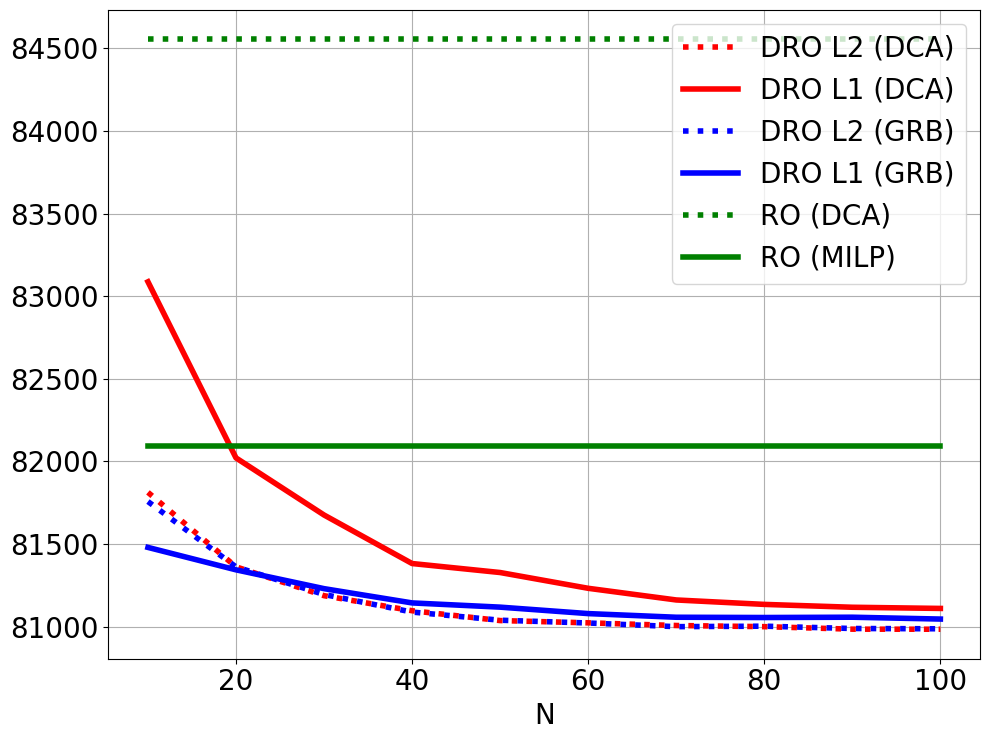

In [56]:
colors = ['red', 'red', 'blue', 'blue', 'green', 'green']
linestyles = [':', '-', ':', '-', ':', '-']

plt.figure(figsize=(10, 7.5))

for i, (df, label) in enumerate(zip(df_list, labels)):
    grouped_data_oos = df.groupby('S').agg({
        'OOS': ['mean', 'std', 'count']
    }).reset_index()
    
    grouped_data_oos.columns = ['S', 'MeanOOS', 'StdOOS', 'Count']
    grouped_data_oos = grouped_data_oos.sort_values('S')
    
    plt.plot(grouped_data_oos['S'], grouped_data_oos['MeanOOS'], 
             linewidth=4, 
             linestyle=linestyles[i],
             label=label,
             color=colors[i])


plt.plot([N for N in range(10, 110, 10)], [84553.6407333737 for N in range(10)], color='green', linestyle=':', linewidth=4, label="RO (DCA)")
plt.plot([N for N in range(10, 110, 10)], [82096.4133442991 for N in range(10)], color='green', linestyle='-', linewidth=4, label="RO (MILP)")
# plt.plot([N for N in range(10, 110, 10)], [61.54 for N in range(10)], color='green', linestyle='--', linewidth=3, label="RO (DCA)")
plt.xlabel("N", fontsize=20)
plt.tick_params(axis='both', labelsize=20)
# Augmenter la taille de la notation scientifique (1e6)
plt.gca().yaxis.offsetText.set_fontsize(16)
plt.legend(fontsize=20, loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"OOS_DCA.pdf")  # Enregistrer le graphique

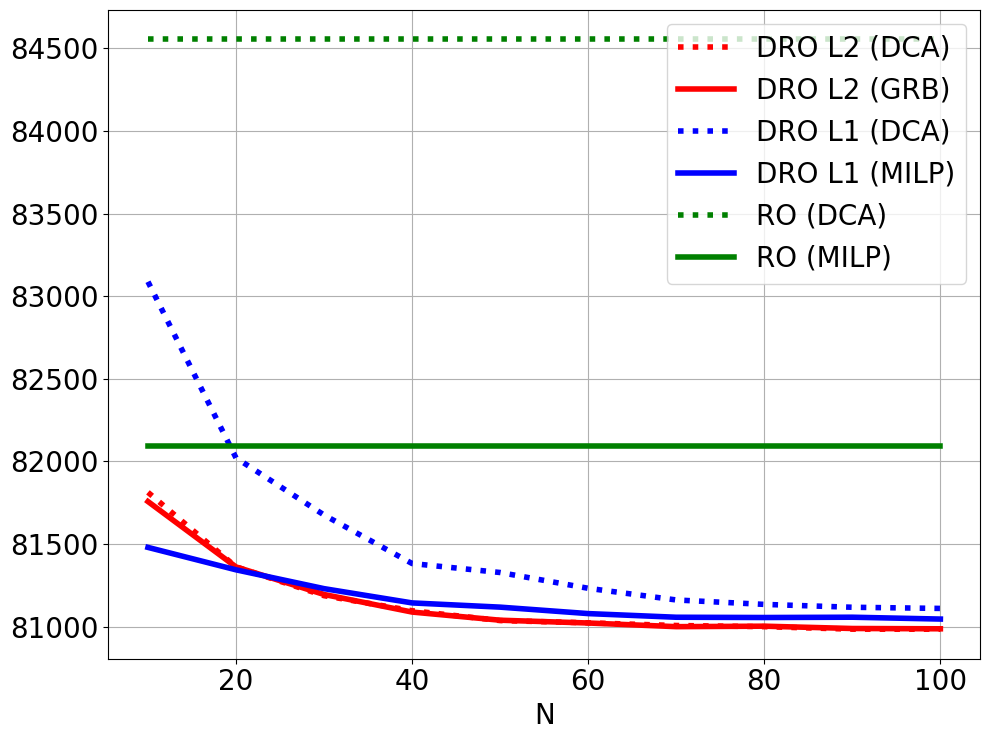

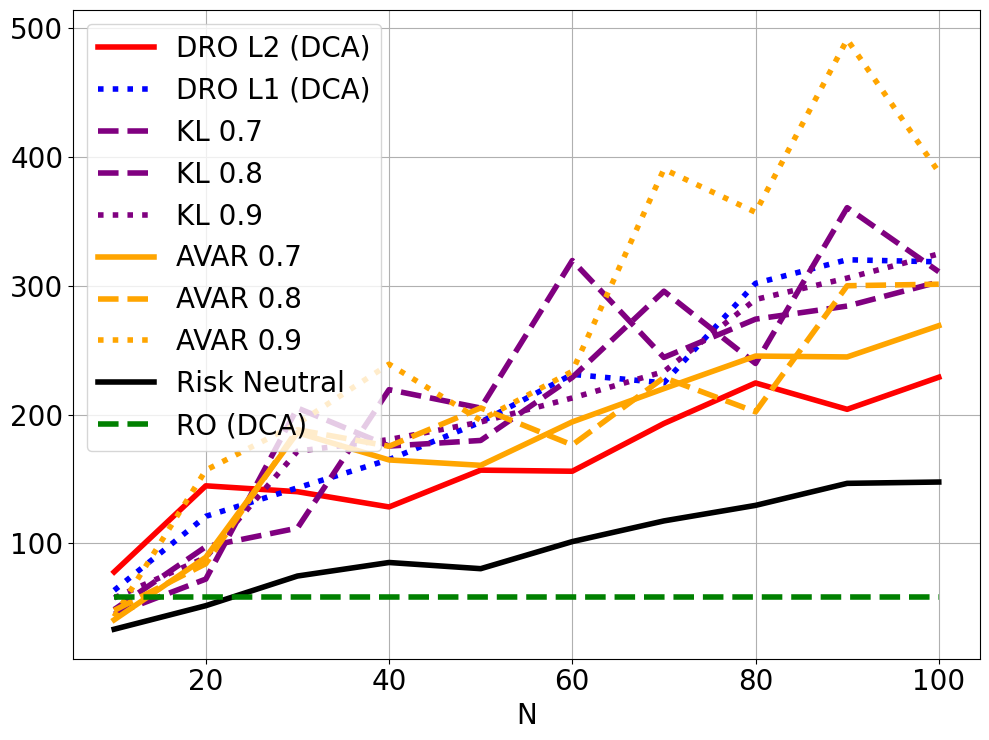

In [49]:
colors = ['red', 'blue', 'purple', 'purple', 'purple', 'orange', 'orange', 'orange', 'black']
linestyles = ['-', ':', '--', '--', ':', '-', '--', ':', '-']

plt.figure(figsize=(10, 7.5))

for i, (df, label) in enumerate(zip(df_list, labels)):
    # Calculer la moyenne OOS et l'écart-type par nombre de scénarios
        
    mean_times = df.groupby('S')['Temps'].mean().reset_index()
    mean_times = mean_times.sort_values('S')
    
    plt.plot(mean_times['S'], mean_times['Temps'], 
             linewidth=4, 
             linestyle=linestyles[i],
             label=label,
             color=colors[i])


plt.plot([N for N in range(10, 110, 10)], [57.88 for N in range(10)], color='green', linestyle='--', linewidth=4, label="RO (DCA)")
# plt.plot([N for N in range(10, 110, 10)], [54.41 for N in range(10)], color='green', linestyle='--', linewidth=4, label="RO (DCA)")
# plt.plot([N for N in range(10, 110, 10)], [37.78 for N in range(10)], color='green', linestyle='--', linewidth=4, label="RO (DCA)")
plt.xlabel("N", fontsize=20)
plt.tick_params(axis='both', labelsize=20)
# Augmenter la taille de la notation scientifique (1e6)
plt.gca().yaxis.offsetText.set_fontsize(16)
plt.legend(fontsize=20, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"time_comparison_{force}.pdf")  # Enregistrer le graphique

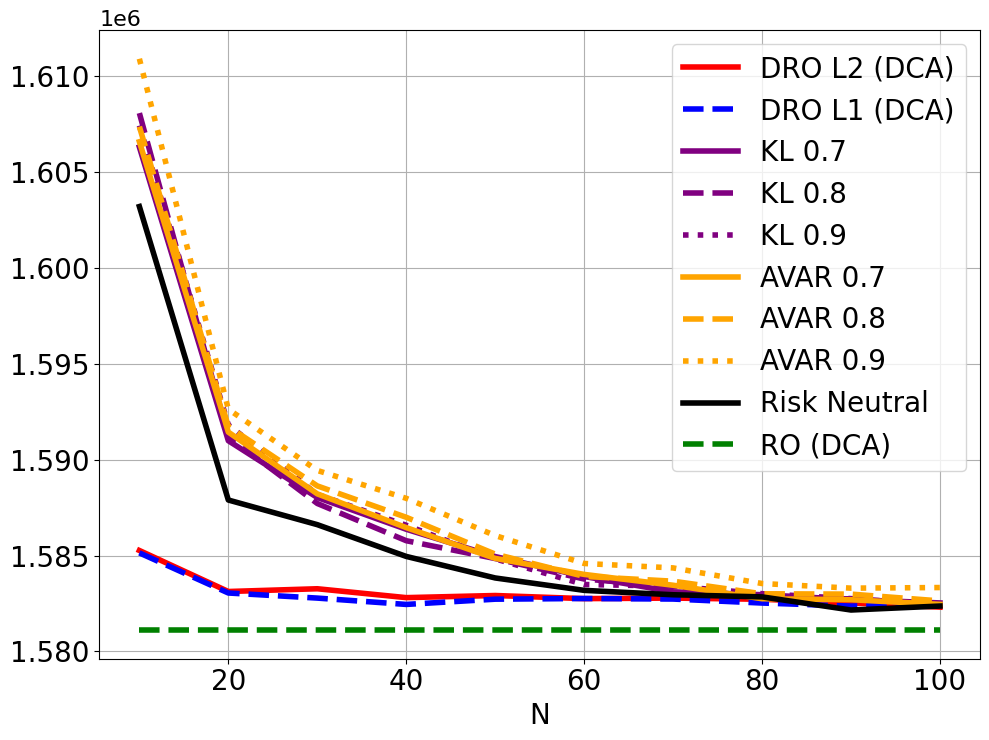

In [50]:
colors = ['red', 'blue', 'purple', 'purple', 'purple', 'orange', 'orange', 'orange', 'black']
linestyles = ['-', '--', '-', '--', ':', '-', '--', ':', '-']

plt.figure(figsize=(10, 7.5))

for i, (df, label) in enumerate(zip(df_list, labels)):
    grouped_data_oos = df.groupby('S').agg({
        'OOS': ['mean', 'std', 'count']
    }).reset_index()
    
    grouped_data_oos.columns = ['S', 'MeanOOS', 'StdOOS', 'Count']
    grouped_data_oos = grouped_data_oos.sort_values('S')
    
    plt.plot(grouped_data_oos['S'], grouped_data_oos['MeanOOS'], 
             linewidth=4, 
             linestyle=linestyles[i],
             label=label,
             color=colors[i])


plt.plot([N for N in range(10, 110, 10)], [1581109.49833715 for N in range(10)], color='green', linestyle='--', linewidth=4, label="RO (DCA)")
# plt.plot([N for N in range(10, 110, 10)], [1599614.26387603 for N in range(10)], color='green', linestyle='--', linewidth=4, label="RO (DCA)")
# plt.plot([N for N in range(10, 110, 10)], [1625646.80132651 for N in range(10)], color='green', linestyle='--', linewidth=4, label="RO (DCA)")
plt.xlabel("N", fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.gca().yaxis.offsetText.set_fontsize(16)
plt.legend(fontsize=20, loc='upper right')
plt.grid(True)
plt.tight_layout()
# plt.show()

plt.savefig(f"OOS_comparison_{force}.pdf") 